In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
df_orig = pd.read_csv('hh_ru_dataset.csv')
df = pd.read_csv('processed-hh-ru.csv')

Median = 1990.0
Mode = 0    1998
Name: year_of_birth, dtype: int64


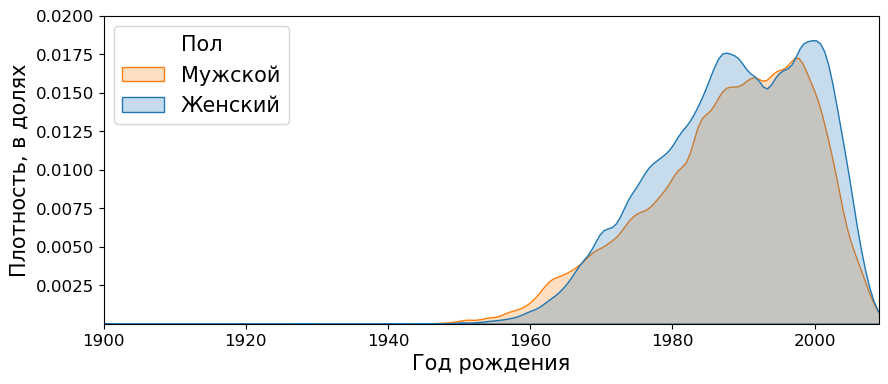

In [8]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df_orig, x='year_of_birth', hue='gender', fill=True)
plt.legend(labels=['Мужской', 'Женский'], loc='upper left', title='Пол', fontsize=15, title_fontsize=15)
plt.xlim(df_orig.year_of_birth.min(), df_orig.year_of_birth.max())
plt.xlabel('Год рождения', fontsize=15)
plt.ylabel('Плотность, в долях', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(ticks=np.arange(0.0025, 0.0200, 0.0025), fontsize=12)
print(f'Median = {df_orig.year_of_birth.median()}')
print(f'Mode = {df_orig.year_of_birth.mode()}')

([<matplotlib.axis.YTick at 0x20da57e3b50>,
 [Text(0, 0.5, 'Год\nрождения'),
  Text(0, 1.5, 'Ожидаемая\nЗП'),
  Text(0, 2.5, 'Опыт\nработы'),
  Text(0, 3.5, 'ЗП от'),
  Text(0, 4.5, 'ЗП до')])

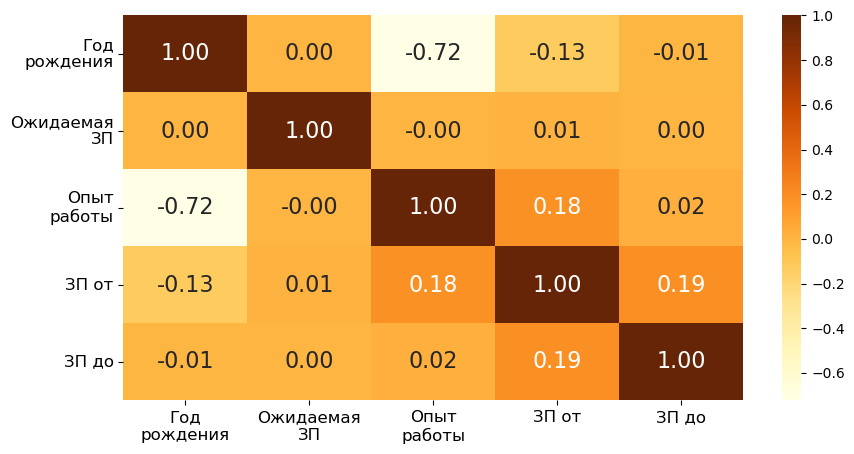

In [5]:
plt.figure(figsize=(10, 5))
cor = df_orig.select_dtypes(include=np.number)
ax = sns.heatmap(cor.corr(), cmap='YlOrBr', annot=True, annot_kws={'size': 16}, fmt='.2f')
plt.xticks(
   ticks=[0.5, 1.5, 2.5, 3.5, 4.5],
   labels=['Год\nрождения', 'Ожидаемая\nЗП', 'Опыт\nработы', 'ЗП от', 'ЗП до'],
   rotation=0,
   fontsize=12
)
plt.yticks(
    ticks=[0.5, 1.5, 2.5, 3.5, 4.5],
    labels=['Год\nрождения', 'Ожидаемая\nЗП', 'Опыт\nработы', 'ЗП от', 'ЗП до'],
    fontsize=12
)

In [6]:
df.vacancy_region.unique().shape

(87,)

In [7]:
df.profession.unique().shape

(68,)

In [14]:
cn = []
for region in df.vacancy_region.unique().tolist():
    cn += [df[df.vacancy_region == region].profession.unique().shape[0]]
cn = np.array(cn)
print(f'Медиана количества доступных профессий: {np.median(cn)}')
cn

Медиана в каждом регионе по количеству доступных профессий: 66.0


array([68, 68, 65, 68, 67, 68, 68, 68, 67, 64, 67, 68, 68, 61, 68, 57, 68,
       68, 62, 68, 67, 68, 66, 68, 66, 68, 67, 68, 68, 64, 61, 65, 61, 68,
       67, 67, 67, 67, 68, 59, 68, 68, 64, 67, 68, 66, 62, 62, 41, 63, 61,
       63, 62, 64, 68, 68, 68, 67, 65, 67, 68, 68, 34, 68, 67, 62, 27, 60,
       61, 68, 20, 60, 23, 42, 47, 57, 33, 30, 46, 31, 61, 16, 26, 38,  4,
        3,  2])

[Text(0, 0, '230113'),
 Text(0, 0, '108860'),
 Text(0, 0, '69761'),
 Text(0, 0, '48194'),
 Text(0, 0, '28443'),
 Text(0, 0, '12924'),
 Text(0, 0, '1543'),
 Text(0, 0, '60')]

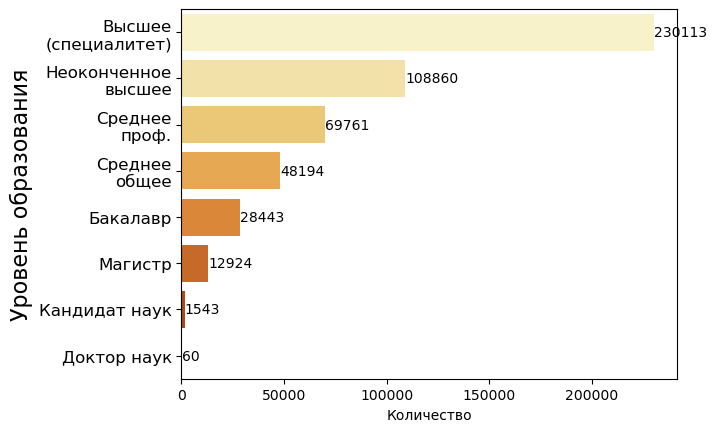

In [27]:
ax = sns.countplot(df_orig, y='education_level', palette='YlOrBr', order=df_orig.education_level.value_counts().index)
plt.yticks(rotation=0, fontsize=12, ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=[
    'Высшее\n(специалитет)', 'Неоконченное\nвысшее',
    'Среднее\nпроф.', 'Среднее\nобщее', 
    'Бакалавр', 'Магистр', 'Кандидат наук', 'Доктор наук'
])
plt.ylabel('Уровень образования', fontsize=16)
plt.xlabel('Количество')
ax.bar_label(ax.containers[0])